In [1]:
# Author : Michelle O'Connor

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

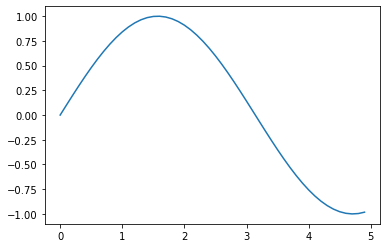

In [3]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

In [4]:
# https://towardsdatascience.com/a-simple-guide-to-beautiful-visualizations-in-python-f564e6b9d392
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [5]:
# Adjust figure size and clean up padding in plot/subplots
plt.figure(figsize=(8,4), tight_layout=True)

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [6]:
# Figure appearance
# plt.hist(..., color=sns.color_palette('Set2')[2], linewidth=2)

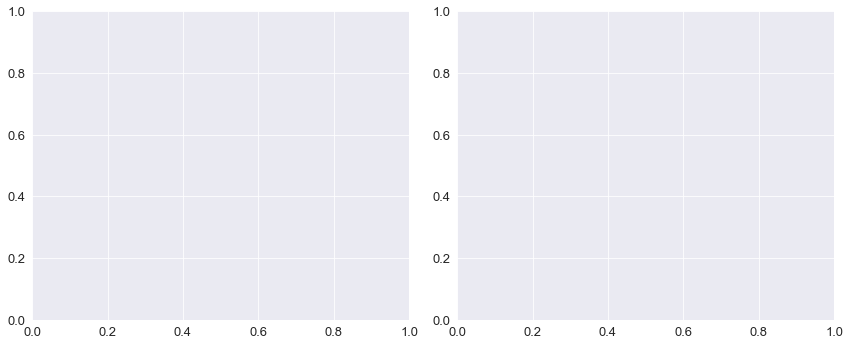

In [7]:
#subplots
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12, 5), tight_layout=True)

In [28]:
df_fifa21 = pd.read_csv('fifa-data/fifa2021players.csv')
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]

In [29]:
# Preprocessing
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

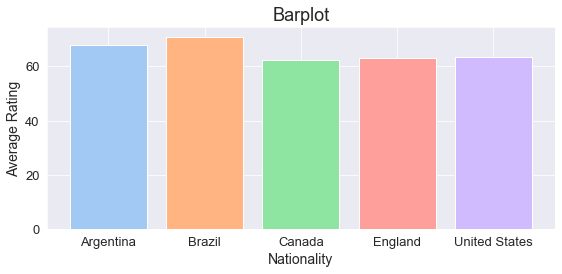

In [30]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
# plt.bar(barplot['nationality'], barplot['overall'])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.show()

In [13]:
# Preprocessing
barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]
barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()

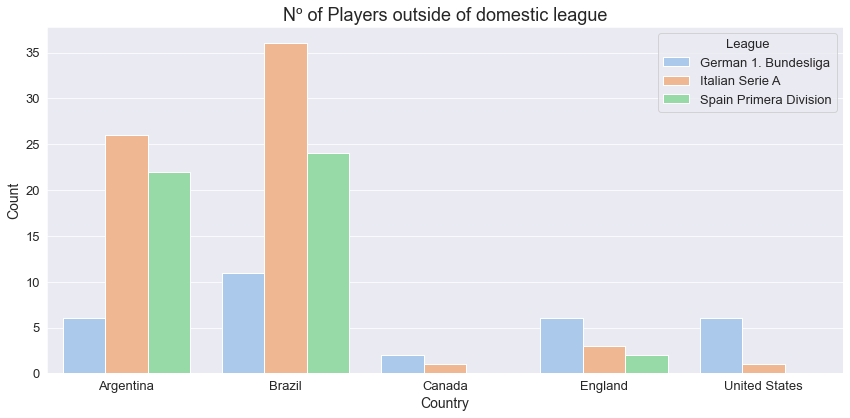

In [14]:
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], hue=barplot['league_name'], palette='pastel')
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.show()

Text(0, 0.5, 'Count')

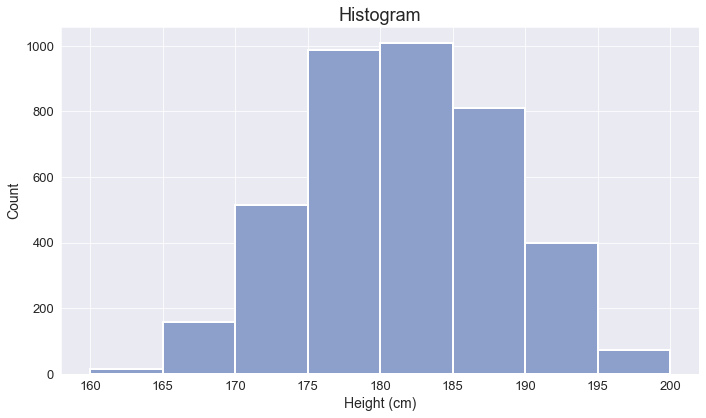

In [15]:
plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
# matplotlib
plt.hist(df_country['height_cm'], bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count')

In [16]:
# Preprocessing
piechart = df_fifa21[df_fifa21['club_name']=='Chelsea']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
piechart = piechart[:11]

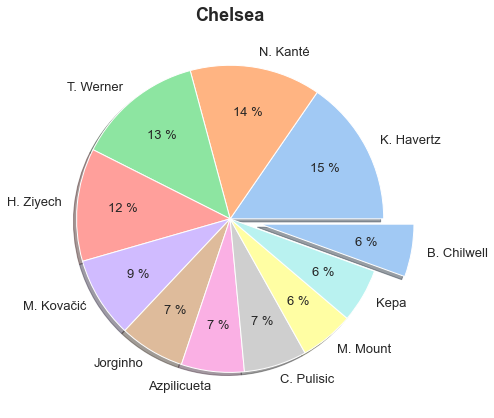

In [17]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Chelsea', weight='bold')
plt.show()

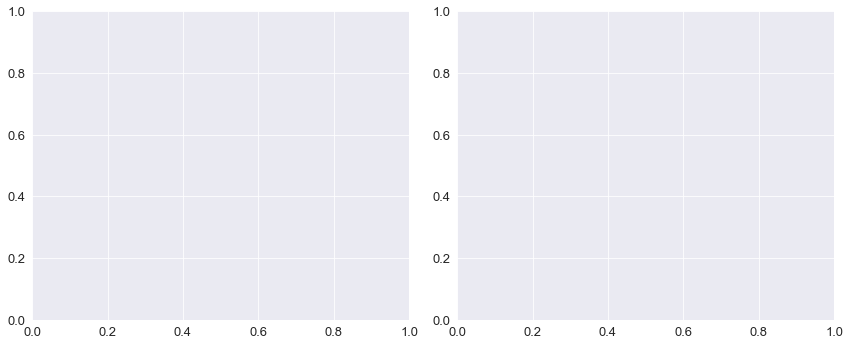

In [18]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)
# Preprocessing
piechart2 = df_fifa21[df_fifa21['nationality']=='United States']
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]

In [19]:
colors = sns.color_palette('pastel')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Chelsea', weight='bold')

explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('USA', weight='bold')
plt.show()

In [33]:
# preprocessing
df_fifa21 = pd.read_csv('fifa-data/fifa2021players.csv')
df_fifa20 = pd.read_csv('fifa-data/fifa2020players.csv')
df_fifa19 = pd.read_csv('fifa-data/fifa2019players.csv')
df_fifa18 = pd.read_csv('fifa-data/fifa2018players.csv')
df_fifa17 = pd.read_csv('fifa-data/fifa2017players.csv')
frames = [df_fifa17, df_fifa18, df_fifa19, df_fifa20, df_fifa21]
for i, frame in enumerate(frames):
    frame['year'] = 2017 + i
    
lineplot = pd.concat(frames)[['short_name', 'overall', 'year']]
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
lineplot = lineplot[lineplot['short_name'].isin(list_players)]
lineplot = lineplot.pivot(index='short_name', columns='year' ,values='overall').T
lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('year')

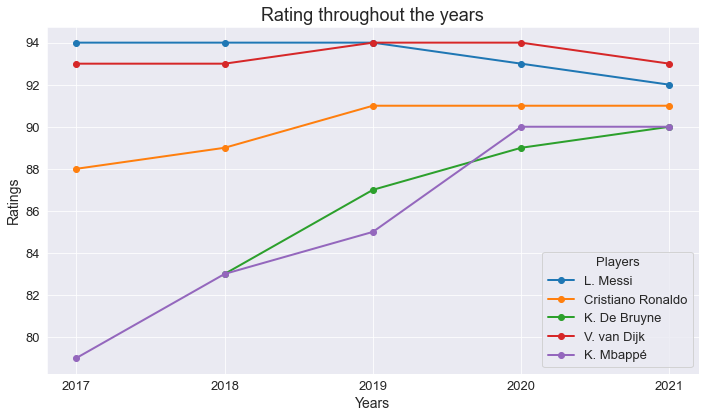

In [36]:
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(lineplot, 'o-', linewidth=2)
#customization
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating throughout the years')
plt.legend(title='Players', title_fontsize = 13, labels=['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'V. van Dijk', 'K. Mbappé'])
plt.show()

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html